# Описание проекта

Вас пригласили на стажировку в отдел маркетинговой аналитики Яндекс.Афиши. Первое задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.
Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
* лог сервера с данными о посещениях сайта Яндекс.Афиши;
* выгрузка всех заказов за этот период;
* статистика рекламных расходов.

Вам предстоит изучить:
* как клиенты пользуются сервисом;
* когда делают первые покупки на сайте;
* сколько денег приносит компании каждый клиент;
* когда расходы на привлечение клиента окупаются.

Выручка измеряется в условных единицах — у.е.

# Описание данных

Файл `visits_log.csv` хранит лог сервера с информацией о посещениях сайта, `orders_log.csv` — информацию о заказах, а `costs.csv` — информацию о расходах на маркетинг.

Структура `visits_log.csv`:
* `Uid` — уникальный идентификатор пользователя;
* `Device` — категория устройства пользователя;
* `Start Ts` — дата и время начала сессии;
* `End Ts` — дата и время окончания сессии;
* `Source Id` — идентификатор источника перехода на сайт.

Структура `orders_log.csv`:
* `Uid` — уникальный идентификатор пользователя;
* `Buy Ts` — дата и время заказа;
* `Revenue` — сумма заказа.

Структура `costs.csv`:
* `source_id` — идентификатор рекламного источника;
* `dt` — дата проведения рекламной кампании;
* `costs` — расходы на эту кампанию.

## Загрузка данных и подготовка их к анализу

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Прочитаем данные из предоставленных файлов.

In [2]:
df_visits = pd.read_csv('/datasets/visits_log.csv')
df_orders = pd.read_csv('/datasets/orders_log.csv')
df_costs = pd.read_csv('/datasets/costs.csv')

Напишем фукнцию def для быстрого вывода определенной информации таблицы.

In [3]:
def inf(data: 'DataFrame'):
    print()
    print('Описание данных таблицы')
    print(data.info())
    print('====================================================================')
    print('Процент пропусков в таблице')
    print(data.isna().mean())
    print('====================================================================')
    print('Проверка на дубликаты')
    print(data.duplicated().sum())
    print('====================================================================')
    print('Визуальный осмотр данных таблицы')
    display(data.sample(5))

### Таблица `df_visits`

Применим функцию к таблице `df_visits`.

In [4]:
inf(df_visits)


Описание данных таблицы
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None
Процент пропусков в таблице
Device       0.0
End Ts       0.0
Source Id    0.0
Start Ts     0.0
Uid          0.0
dtype: float64
Проверка на дубликаты
0
Визуальный осмотр данных таблицы


,Device,End Ts,Source Id,Start Ts,Uid
170166,desktop,2018-05-15 20:10:00,2,2018-05-15 20:07:00,11680900754697023979
82937,desktop,2017-06-06 00:40:00,5,2017-06-06 00:39:00,17001806706314070623
281701,touch,2018-03-09 17:01:00,1,2018-03-09 16:14:00,12903662005444288538
159223,touch,2017-11-22 18:21:00,4,2017-11-22 18:18:00,5998547429597512057
96140,desktop,2017-12-04 20:28:00,3,2017-12-04 19:24:00,5586842749290705144


Дубликаты и пропуски в таблице не найдены. Чтобы подготовит таблицу к анализу нужно:
* изменить названия столбцов на более удобный вариант;
* изменить тип данных в столбцах `End Ts` и `Start Ts` на с *object* на *datetime64*.

Изменим названия столбцов.

In [5]:
df_visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

Изменим тип данных в столбцах `end_ts` и `start_ts` на *datetime*.

In [6]:
df_visits['end_ts'] = pd.to_datetime(df_visits['end_ts'])
df_visits['start_ts'] = pd.to_datetime(df_visits['start_ts'])

### Таблица `df_orders`

Применим функцию к таблице `df_orders`.

In [7]:
inf(df_orders)


Описание данных таблицы
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None
Процент пропусков в таблице
Buy Ts     0.0
Revenue    0.0
Uid        0.0
dtype: float64
Проверка на дубликаты
0
Визуальный осмотр данных таблицы


,Buy Ts,Revenue,Uid
22347,2017-12-06 14:46:00,1.83,11312808054988773271
46155,2018-05-02 18:08:00,1.83,17427599979615505050
22532,2017-12-07 12:47:00,4.58,17601134005060988096
27901,2018-01-03 17:50:00,1.95,976711395330271212
43467,2018-04-08 12:31:00,1.83,4594408494302234905


Аналогичная ситуация. Проделаем те же действия.

In [8]:
df_orders.columns = ['buy_ts', 'revenue', 'uid']

In [9]:
df_orders['buy_ts'] = pd.to_datetime(df_orders['buy_ts'])

### Таблица `df_costs`

Применим функцию к таблице `df_costs`.

In [10]:
inf(df_costs)


Описание данных таблицы
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None
Процент пропусков в таблице
source_id    0.0
dt           0.0
costs        0.0
dtype: float64
Проверка на дубликаты
0
Визуальный осмотр данных таблицы


,source_id,dt,costs
1484,5,2017-07-03,107.34
2051,9,2018-01-22,23.39
39,1,2017-07-10,30.69
208,1,2017-12-26,102.80
360,1,2018-05-29,61.13


В этой таблице также отсутствуют пропуски и дубликаты. Здесь необходимо только поменять тип переменных в столбце `dt` на *datetime*.  

In [11]:
df_costs['dt'] = pd.to_datetime(df_costs['dt'])

### Вывод

Мы получили практически идеальные данные. Во всех датасетах отсутствуют пропуски и дубликаты. Пришлось поменять только тип данных переменных в столбцах с датами на *datetime*. Также для удобства использования некоторые названия столбцов были приведены к нижнему регистру.

## Продуктовые метрики

### Количество уникальных пользователей в день, неделю, месяц (DAU, WAU, MAU)

Для того, чтобы посчитать количество уникальных пользователей в день, неделю и месяц воспользуемся таблицей с информацией о посещениях сайта `df_visits`.

Сперва выделим в отдельные столбцы дату, неделю, месяц и год.

In [12]:
df_visits['session_date'] = df_visits['start_ts'].dt.date
df_visits['session_week'] = df_visits['start_ts'].dt.week
df_visits['session_month'] = df_visits['start_ts'].dt.month
df_visits['session_year'] = df_visits['start_ts'].dt.year
df_visits.head()

,device,end_ts,source_id,start_ts,uid,session_date,session_week,session_month,session_year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017


Посчитаем DAU, WAU, MAU.

In [13]:
dau = df_visits.groupby('session_date').agg({'uid' : 'nunique'})
wau = df_visits.groupby(['session_year', 'session_week']).agg({'uid' : 'nunique'})
mau = df_visits.groupby(['session_year', 'session_month']).agg({'uid' : 'nunique'})

print('Среднее количество уникальных пользователей в день (DAU): {}'.format(int(dau.mean())))
print('Среднее количество уникальных пользователей в неделю (WAU): {}'.format(int(wau.mean())))
print('Среднее количество уникальных пользователей в месяц (MAU): {}'.format(int(mau.mean())))

Среднее количество уникальных пользователей в день (DAU): 907
Среднее количество уникальных пользователей в неделю (WAU): 5716
Среднее количество уникальных пользователей в месяц (MAU): 23228


Визуализируем результат. Построим на изменение количества уникальных пользователей в день за весь предоставленный временной интервал.

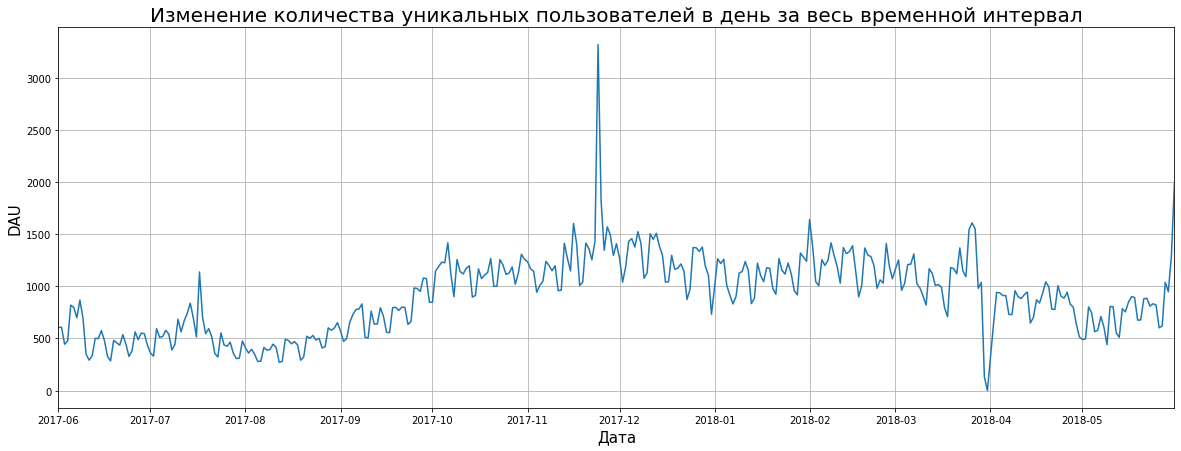

In [14]:
dau.plot(figsize = (20, 7), grid = True, legend = False)

plt.title('Изменение количества уникальных пользователей в день за весь временной интервал', fontsize = 20)
plt.ylabel('DAU', fontsize = 15)
plt.xlabel('Дата', fontsize = 15)
plt.show()

Сразу выделяется из общей картины резкий скачок DAU в конце декабря 2017 года. Скорее всего это связано с предновогодними днями и выходом фильма "Движение вверх", который значительное время был рекордсменом по сборам в стране. 

Также стоит обратить внимание на резкое падение метрики до нуля в конце апреля 2018 года. Возможно тогда была какая-то проблема, связанная с работой сайта.

Построим графики изменения WAU и DAU во времени.

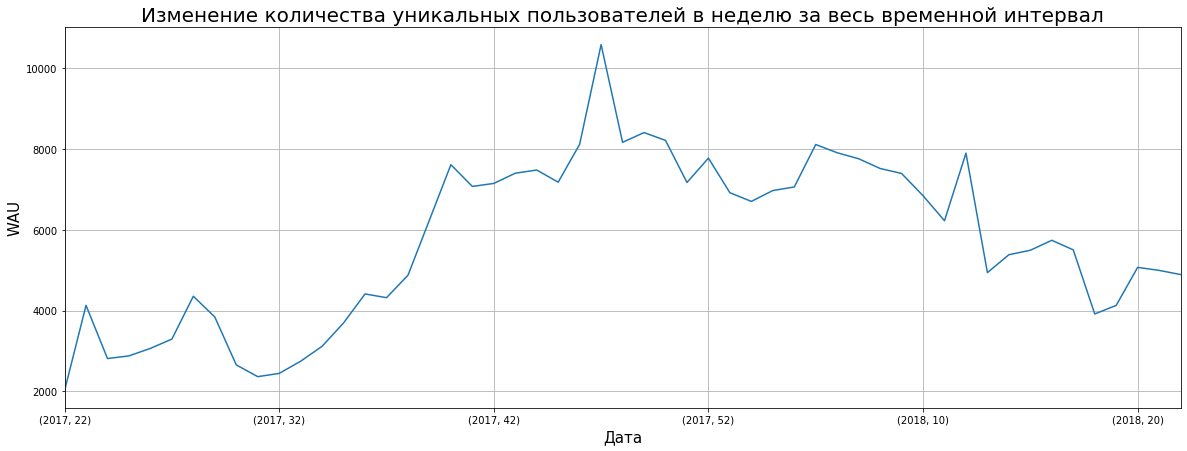

In [15]:
wau.plot(figsize = (20, 7), grid = True, legend = False)

plt.title('Изменение количества уникальных пользователей в неделю за весь временной интервал', fontsize = 20)
plt.ylabel('WAU', fontsize = 15)
plt.xlabel('Дата', fontsize = 15)
plt.show()

Тенденция графика в основном не меняется. После малой активности пользователей в летние месяцы метрика начинает быстро расти вверх и достигает своего пика под конец ноября, а затем начинает плавное снижение, не доходя до уровня, который был в начале июля 2017 года. Также выделяется резкий скачок метрики под конец марта.

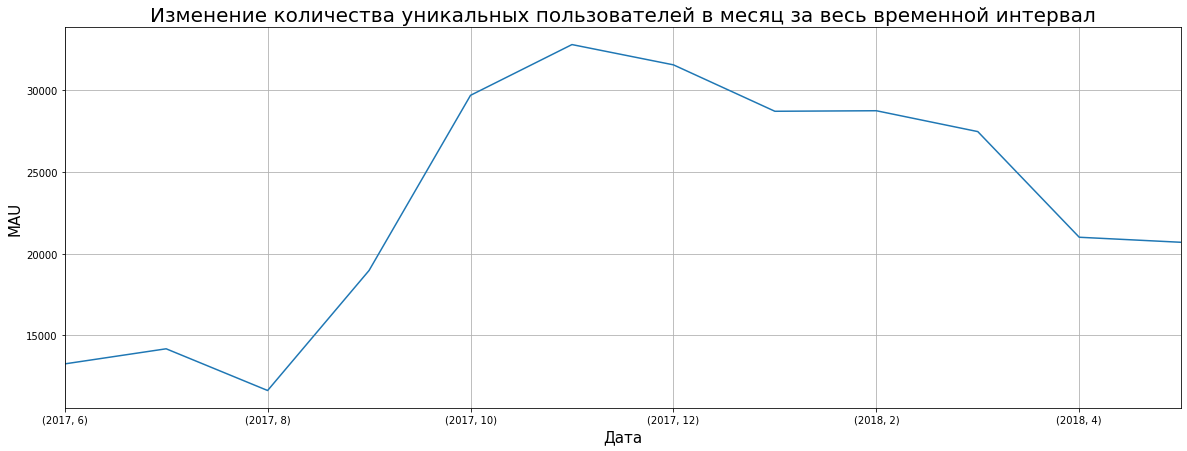

In [16]:
mau.plot(figsize = (20, 7), grid = True, legend = False)

plt.title('Изменение количества уникальных пользователей в месяц за весь временной интервал', fontsize = 20)
plt.ylabel('MAU', fontsize = 15)
plt.xlabel('Дата', fontsize = 15)
plt.show()

Наблюдается аналогичная картина только в более большем масштабе.

Судя по характеру найденных метрик пользователи меньше всего интересуются культурными мероприятиями в летнее время, но с начала осени начинают искать отличные от летних виды досуга. Пик заитересованности наступает ближе к предновогодним дням, а потом плавно снижается ближе к лету.

### Сколько раз за день пользователи в среднем заходят на сайт?

Посчитаем сколько раз пользователи в среднем заходят на сайт. 

In [17]:
visits_in_day = df_visits.groupby('session_date').agg({'uid' : 'count'})
print('Пользователи в среднем заходят на сайт {} раз в день.'.format(int(visits_in_day.mean())))

Пользователи в среднем заходят на сайт 987 раз в день.


Посмотрим на графике как эта метрика меняется во времени.

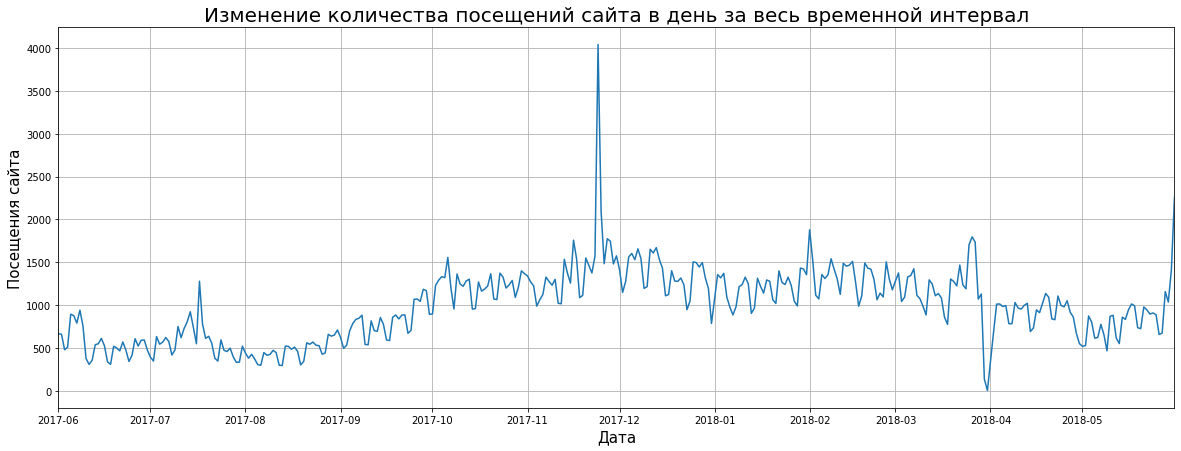

In [18]:
visits_in_day.plot(figsize = (20, 7), grid = True, legend = False)

plt.title('Изменение количества посещений сайта в день за весь временной интервал', fontsize = 20)
plt.ylabel('Посещения сайта', fontsize = 15)
plt.xlabel('Дата', fontsize = 15)
plt.show()

Поведение этой метрики сходится с поведением метрики DAU. Отличие только в большем значении пиков. 

Чтобы посчитать количество сессий на одного пользователя в день поделим среднее число заходов на сайт в день `visits_in_day` на среднее количество уникальных пользователей в день `dau.

In [19]:
session_per_user_in_day = visits_in_day / dau
print('В среднем один пользователь заходит на сайт {:.2f} раз в день'.format(session_per_user_in_day.mean()[0]))

В среднем один пользователь заходит на сайт 1.08 раз в день


### Сколько времени пользователи проводят на сайте?

Посчитаем сколько времени пользователи проводят времени на сайте и посмотрим на распределение этой переменной.

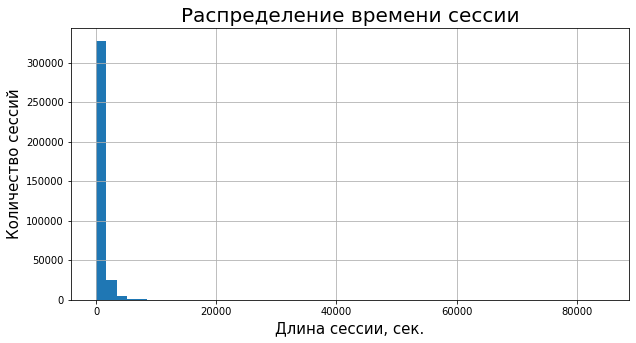

In [20]:
df_visits['session_duration_sec'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.seconds

df_visits['session_duration_sec'].hist(bins = 50, figsize = (10, 5))
plt.title('Распределение времени сессии', fontsize = 20)
plt.ylabel('Количество сессий', fontsize = 15)
plt.xlabel('Длина сессии, сек.', fontsize = 15)
plt.show()

По такому жирному хвосту видно, что есть пользователи у кого сайт открыт круглосуточно. 

Расчитаем ASL. По форме распределения правильней всего рассматривать моду переменной, но все-равно взглянем и на среднее арифметическое и на медиану.

Поиск среднего значения через медиану или среднего арифметического применяют для нормального распределения, но распределение длины сессии далеко от нормального, поэтому для подсчета среднего значения будем ориентироваться на моду.

In [21]:
print('Мода ASL: {} сек.'.format(int(df_visits['session_duration_sec'].mode())))
print('Медиана ASL: {} сек.'.format(int(df_visits['session_duration_sec'].mean())))
print('Среднее арифметическое ASL: {} сек.'.format(int(df_visits['session_duration_sec'].median())))

Мода ASL: 60 сек.
Медиана ASL: 643 сек.
Среднее арифметическое ASL: 300 сек.


Судя по моде пользователи сидят на сайте минуту. Нельзя сказать, что это хорошо, но для утешения можно сказать, что некоторые сайты, например Кинопоиск, переводят на Афишу только для того, чтобы выбрать места в зале и оформить покупку билета, что занимает не так много времени. Но все-равно надо обратить внимание на этот показатель.

### Расчет Retention Rate

Для определения этой метрики нужно распределить пользователей по когортам. Когорта характеризуется событием и периодом, когда совершалось это событие. Для начала определим дату первого посещения на сайт для каждого пользователя. 

Для этого составим новую таблицу, сгруппировав дату первого посещения для каждого пользователя, затем переименуем полученый столбец с датами на `first_visit_date` и объеденим полученную таблицу с таблицей `df_visits`.

In [22]:
first_visit_date = df_visits.groupby('uid')['start_ts'].min()
first_visit_date.name = 'first_visit_date'
df_visits = df_visits.join(first_visit_date, on = 'uid')

Так как период когорты будет равняться одному месяцу, то выделим из даты первого посещения и из даты начала сессии месяц.

In [23]:
df_visits['first_visit_month'] = df_visits['first_visit_date'].astype('datetime64[M]')
df_visits['start_ts_month'] = df_visits['start_ts'].astype('datetime64[M]')

Теперь уже можно найти время жизни когорты. Для этого посчитаем разницу между переменными в столбцах `first_visit_date` и `start_ts_month`. Затем поделим эту разность на постоянную `np.timedelta64(1,'M')` и приведем это значение к целочисленному формату.

In [24]:
df_visits['cohort_lifetime'] = (df_visits['start_ts_month'] - df_visits['first_visit_month'])
df_visits['cohort_lifetime'] = df_visits['cohort_lifetime'] / np.timedelta64(1,'M')
df_visits['cohort_lifetime'] = df_visits['cohort_lifetime'].round().astype('int')
df_visits['first_visit_month'] = df_visits['first_visit_month'].dt.strftime('%Y-%m')

Теперь сгруппируем данные по когорте и ее жизни. Посчитаем для каждой когорты количество активных пользователей на определенный месяц жизни когорты.

In [25]:
cohorts = df_visits.groupby(['first_visit_month', 'cohort_lifetime']).agg({'uid' : 'nunique'}).reset_index()
cohorts

,first_visit_month,cohort_lifetime,uid
0,2017-06,0,13259
1,2017-06,1,1043
2,2017-06,2,713
3,2017-06,3,814
4,2017-06,4,909
...,...,...,...
73,2018-03,1,861
74,2018-03,2,557
75,2018-04,0,15709
76,2018-04,1,760


Найдем исходное количество пользователей в когороте. Для этого возьмем количество пользователей на нулевой месяц и переименуем названия столбца с пользователями в `cohort_user`.

In [26]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month', 'uid']]
initial_users_count = initial_users_count.rename(columns = {'uid' : 'cohort_user'})

Объединим данные по когортам с исходным количеством пользователей в когорте.

In [27]:
cohorts = cohorts.merge(initial_users_count, on = 'first_visit_month')

Пришло время рассчитать Retention Rate. Для этого разделим количество пользователей в каждый из месяцев на изначальное количество пользователей в когорте.

In [28]:
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_user']

Составим сводную таблицу `retention_pivot`.

In [29]:
retention_pivot = cohorts.pivot_table(index = 'first_visit_month',
                                      columns = 'cohort_lifetime', 
                                      values = 'retention', 
                                      aggfunc = 'sum')
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Визуализируем `retention_pivot` в виде тепловой карты.

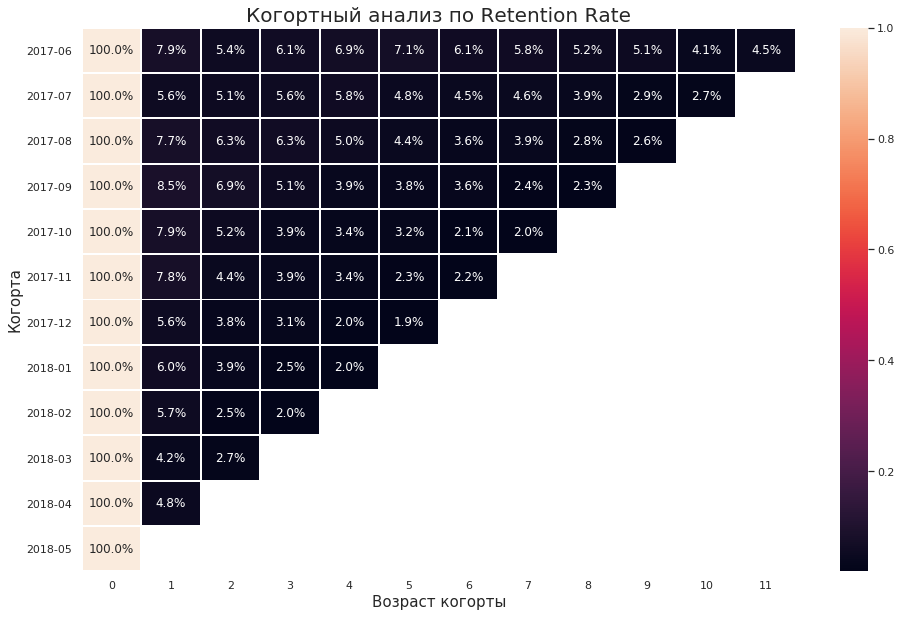

In [30]:
sns.set(style='white')
plt.figure(figsize=(16, 10))
plt.title('Когортный анализ по Retention Rate', fontsize = 20)
sns.heatmap(retention_pivot, annot = True, fmt = '.1%', linewidths = 1, linecolor = 'white')
plt.xlabel('Возраст когорты', fontsize = 15)
plt.ylabel('Когорта', fontsize = 15)
plt.show()

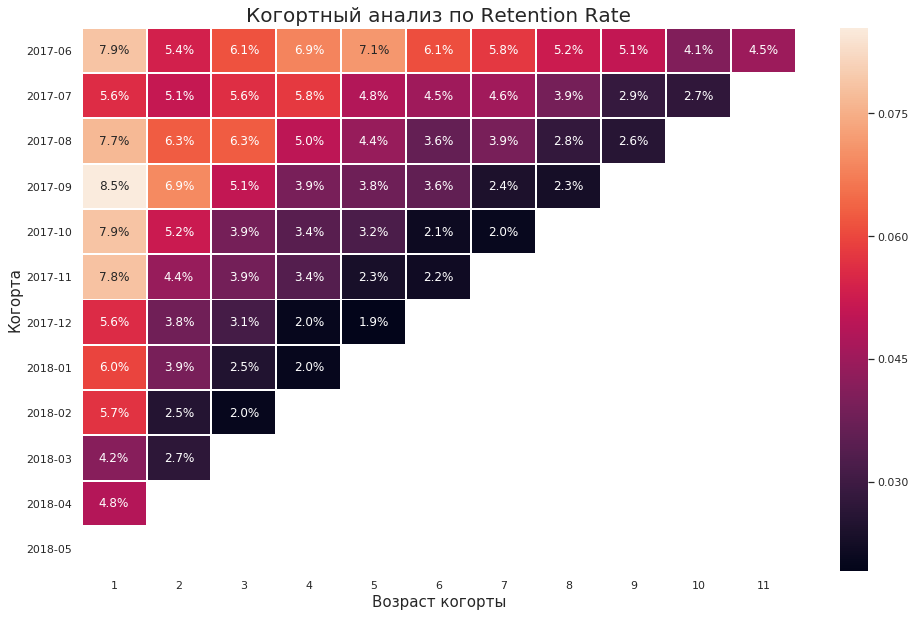

In [31]:
sns.set(style='white')
plt.figure(figsize=(16, 10))
plt.title('Когортный анализ по Retention Rate', fontsize = 20)
sns.heatmap(retention_pivot.loc[:,1:11], annot = True, fmt = '.1%', linewidths = 1, linecolor = 'white')
plt.xlabel('Возраст когорты', fontsize = 15)
plt.ylabel('Когорта', fontsize = 15)
plt.show()

Рассчитаем средний Retention Rate на второй месяц жизни когорт.

In [32]:
print('Средний Retention Rate на второй месяц жизни когорт равен {:.1%}'.format(retention_pivot[1].mean()))

Средний Retention Rate на второй месяц жизни когорт равен 6.5%


Судя по показателям 93-95% клиентов уходят после первого визита на сайт. Средний RR постпенно падает на протяжении жизни когорт. Июньскаяя когорта является самой "верной" когортой из всех. 
Нужно посоветовать маркетологам:
* налаживать обратную связь с пользователями;
* делиться с пользователями специальными предложениями; 
* информировать пользователей о популярных ивентах;
* собирать данные о пользователях для персонализации рассылок.

## Метрики электронной коммерции

### Cколько времени в среднем проходит с момента первого посещения сайта до совершения покупки?

Для ответа на этот вопрос нужно воспользоваться двумя таблицами `first_visit_date`, где находится информация о первом посещении сайта, и `df_orders`. Но для начала найдем дату первого заказа для каждого клиента и превратим полученный `Series` в `DataFrame`.

In [33]:
first_order_date = df_orders.groupby('uid')['buy_ts'].min().reset_index()
first_order_date.columns = ['uid', 'first_order_date']
first_order_date.head()

,uid,first_order_date
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


Также преобразуем `first_visit_date` в `DataFrame`.

In [34]:
first_visit_date = first_visit_date.reset_index()
first_visit_date.columns = ['uid', 'first_visit_date']
first_visit_date.head()

,uid,first_visit_date
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


Объеденим полученные таблицы.

In [35]:
first_visits_orders = first_visit_date.merge(first_order_date, on = 'uid')
first_visits_orders.head()

,uid,first_visit_date,first_order_date
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


Посчитаем время от первого посещения до первого заказа в секундах.

In [36]:
first_visits_orders['visit_to_order_time'] = first_visits_orders['first_order_date'] - first_visits_orders['first_visit_date']
first_visits_orders['visit_to_order_time'] = first_visits_orders['visit_to_order_time'].dt.seconds
first_visits_orders.head()

,uid,first_visit_date,first_order_date,visit_to_order_time
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,82920
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,4740
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,71040
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0


Посмотрим на распределение переменной `visit_to_order_time`.

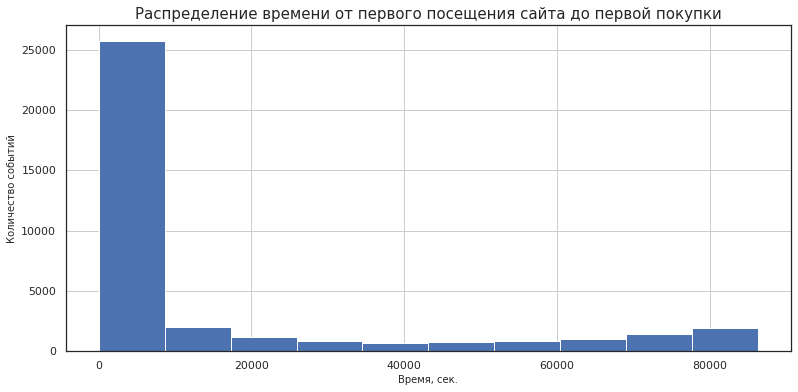

In [37]:
first_visits_orders['visit_to_order_time'].hist(figsize = (13, 6))
plt.title('Распределение времени от первого посещения сайта до первой покупки', fontsize = 15)
plt.xlabel('Время, сек.', fontsize = 10)
plt.ylabel('Количество событий', fontsize = 10)
plt.show()

Ситуация аналогична с распределением времени нахождения пользователя на сайте. Это распределение далеко от номального и поэтому мы используем моду для нахождения среднего значения.

Судя по распределению для определения среднего значения найдем моду переменной.

In [38]:
print('Большинство пользователей совершают покупку после {} секунд нахождения на сайте.'\
.format(first_visits_orders['visit_to_order_time'].mode()[0]))

Большинство пользователей совершают покупку после 60 секунд нахождения на сайте.


### Cреднее количество покупок на одного покупателя за 6 месяцев.

Объеденим таблицы `df_orders`и `first_visit_date` по столбцу `uid`.

In [39]:
df_orders_first_visit = first_visit_date.merge(df_orders, on = 'uid')
df_orders_first_visit.head()

,uid,first_visit_date,buy_ts,revenue
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,0.55
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,1.22
2,1575281904278712,2017-06-03 10:13:00,2017-06-03 17:39:00,1.83
3,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,73.33
4,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,2.44


Найдем значение промежутка времени между первым посещением сайта и покупкой. Добавим значение этой переменной в столбец `time_from_first_visit_to_buy`.

In [40]:
df_orders_first_visit['time_from_first_visit_to_buy'] = \
df_orders_first_visit['buy_ts'] - df_orders_first_visit['first_visit_date']
df_orders_first_visit.head()

,uid,first_visit_date,buy_ts,revenue,time_from_first_visit_to_buy
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,0.55,106 days 23:02:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,1.22,0 days 00:00:00
2,1575281904278712,2017-06-03 10:13:00,2017-06-03 17:39:00,1.83,0 days 07:26:00
3,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,73.33,0 days 01:19:00
4,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,2.44,0 days 19:44:00


Отфильтруем значение `time_from_first_visit_to_buy` так, чтобы оно было не больше 180 дней, то есть не больше полугода.

In [41]:
df_orders_for_first_halfyear = df_orders_first_visit[df_orders_first_visit['time_from_first_visit_to_buy'] <= '180 days']
df_orders_for_first_halfyear.head()

,uid,first_visit_date,buy_ts,revenue,time_from_first_visit_to_buy
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,0.55,106 days 23:02:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,1.22,0 days 00:00:00
2,1575281904278712,2017-06-03 10:13:00,2017-06-03 17:39:00,1.83,0 days 07:26:00
3,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,73.33,0 days 01:19:00
4,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,2.44,0 days 19:44:00


Посчитаем количество покупок на каждого клиента в полученной таблице и выведем среднее количество покупок на одного покупателя.

In [42]:
count_buy = df_orders_for_first_halfyear.groupby('uid').agg({'buy_ts' : 'nunique'}).rename(columns = {'buy_ts' : 'count_buy'})

print(count_buy.head())
print()
print('Среднее количество покупок на одного покупателя за 6 месяцев: {:.2f}'.format(count_buy['count_buy'].mean()))

                  count_buy
uid                        
313578113262317           1
1575281904278712          2
2429014661409475          1
2464366381792757          1
2551852515556206          2

Среднее количество покупок на одного покупателя за 6 месяцев: 1.32


Показатель этой метрики говорит о том, что отдельный пользователь не отличается регулярностью использования предложений сайта Афиши. В основном пользователь совершает покупку на сайте не больше одного раза.

### Расчет среднего чека

Выделим месяц и год из времени покупки.

In [43]:
df_orders['buy_month'] = df_orders['buy_ts'].dt.month
df_orders['buy_year'] = df_orders['buy_ts'].dt.year
df_orders.head()

,buy_ts,revenue,uid,buy_month,buy_year
0,2017-06-01 00:10:00,17.00,10329302124590727494,6,2017
1,2017-06-01 00:25:00,0.55,11627257723692907447,6,2017
2,2017-06-01 00:27:00,0.37,17903680561304213844,6,2017
3,2017-06-01 00:29:00,0.55,16109239769442553005,6,2017
4,2017-06-01 07:58:00,0.37,14200605875248379450,6,2017


Посчитаем средний чек за месяц.

In [44]:
revenue_month = df_orders.groupby(['buy_year', 'buy_month']).agg({'revenue' : 'mean'})

Визуализируем `revenue_month`.

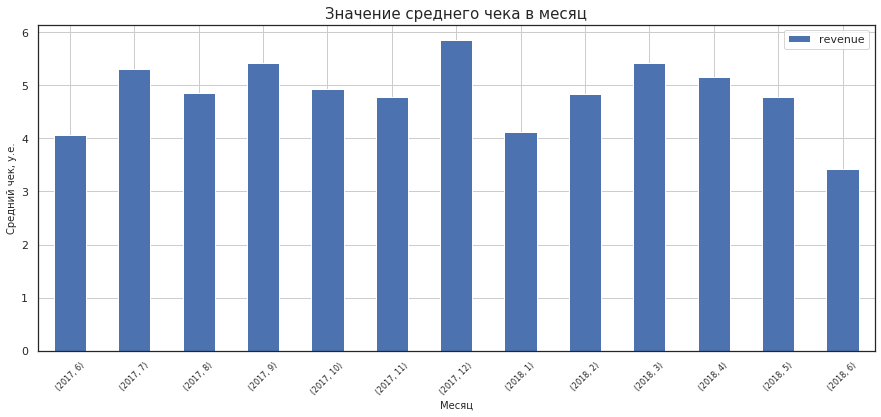

Средний чек равен 4.84 у.е.


In [45]:
revenue_month.plot(kind = 'bar', figsize = (15, 6), grid = True)
plt.title('Значение среднего чека в месяц', size = 15)
plt.xlabel('Месяц', size = 10)
plt.ylabel('Средний чек, у.е.', size = 10)
plt.xticks(rotation = 45, fontsize = 8)
plt.show()
print('Средний чек равен {:.2f} у.е.'.format(revenue_month['revenue'].mean()))

Наибольшее значение среднего чека приходятся на июль, сентябрь, декабрь, март и апрель.

Максимальное значение средний чек приобретает в декабре, что связано с предновогодним сезоном. Минимальные значения приобретает в июне каждого из годов, когда пользователи менее всего заинтересованы в культурных мероприятиях. Также примерно на таком же уровне находится среднее значение чека в январе, когда все просто хотят отдохнуть от новогодних праздников и большинство мероприятий не проводятся из-за большого количества январьских выходных.

### LTV

**LTV** (от англ. *lifetime value*) — «пожизненная» ценность клиента. Это — итоговая сумма денег, которую один клиент приносит в среднем со всех своих покупок.

Выделим месяцы из дат заказов.

In [46]:
df_orders['order_month'] = df_orders['buy_ts'].astype('datetime64[M]')
df_orders.head()

,buy_ts,revenue,uid,buy_month,buy_year,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,6,2017,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,6,2017,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,6,2017,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,6,2017,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,6,2017,2017-06-01


Получим первый месяц покупки каждого покупателя.

In [47]:
first_orders = df_orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


Посчитаем количество новых покупателей за каждый месяц.

In [48]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


Добавим месяц первой покупки каждого покупателя в `df_orders` и сформируем когорты, где каждая строка показывает какую выручку принесла каждая когорта.

In [49]:
orders_new = pd.merge(df_orders,first_orders, on='uid')
cohorts_order = orders_new.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts_order.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


Добавим к этой таблице информацию о том, сколько пользователей первый раз совершили покупку в каждом месяце.

In [50]:
report = pd.merge(cohort_sizes, cohorts_order, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


Выручка в этой таблице является также валовой прибылью, так как по условию маржинальность сервиса равна 100%. 

Рассчитаем возраст когорты.

In [51]:
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head()

,first_order_month,n_buyers,order_month,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4


Рассчитаем LTV.

In [52]:
report['ltv'] = report['revenue'] / report['n_buyers']
report.head()

,first_order_month,n_buyers,order_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


Визуализируем когорты в виде сводной таблицы. Также не стоит забывать, что LTV накопительная метрика.

In [53]:
output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
)
output_cum = output.cumsum(axis = 1)
output_cum.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.20974,5.64738,6.60205,7.62458,8.36008,9.31052,9.89212,10.4453,11.0511,11.6224,11.8792
2017-07-01,6.010218,6.34543,6.96896,7.32794,7.50473,7.66077,7.78098,7.9228,8.08404,8.23118,8.38685,
2017-08-01,5.276518,5.74851,6.20699,6.59827,7.09232,7.37586,7.58653,7.99153,8.28374,8.47172,,
2017-09-01,5.644529,6.76212,7.28305,11.2588,11.6594,12.3065,13.0081,13.2512,13.4352,,,
2017-10-01,5.003733,5.5395,5.73089,5.88803,6.03959,6.15996,6.24477,6.36024,,,,
2017-11-01,5.154683,5.55392,5.75347,6.07842,6.22644,6.28032,6.39524,,,,,
2017-12-01,4.738191,4.99856,5.92366,6.98894,7.30187,7.63991,,,,,,
2018-01-01,4.135636,4.43039,4.73468,4.87745,4.94015,,,,,,,
2018-02-01,4.156987,4.43526,4.51378,4.58792,,,,,,,,


Представим сводную таблицу в виде тепловой карты.

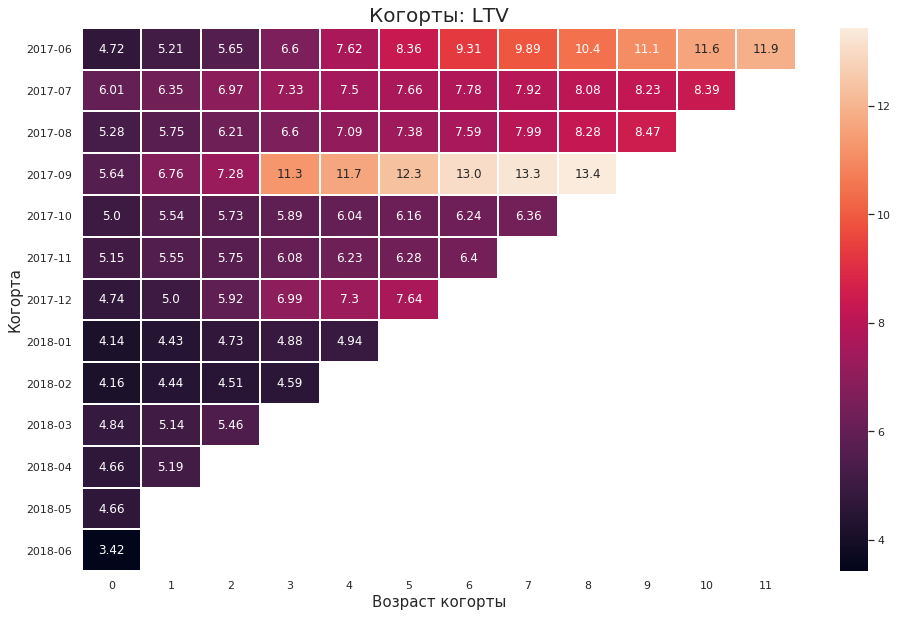

In [54]:
sns.set(style='white')
plt.figure(figsize=(16, 10))
plt.title('Когорты: LTV', fontsize = 20)
sns.heatmap(output_cum, annot = True, linewidths = 1, fmt = '.3', linecolor = 'white', yticklabels = output.index.strftime('%Y-%m'))
plt.xlabel('Возраст когорты', fontsize = 15)
plt.ylabel('Когорта', fontsize = 15)
plt.show()

Рассчитаем средний LTV по когортам за 6 месяцев.

In [55]:
print('Средний LTV по когортам за 6 месяцев равен {:.2f}.'.format(output_cum[5].mean()))

Средний LTV по когортам за 6 месяцев равен 7.97.


Посмотрим на LTV по когортам за 6 месяцев в динамике.

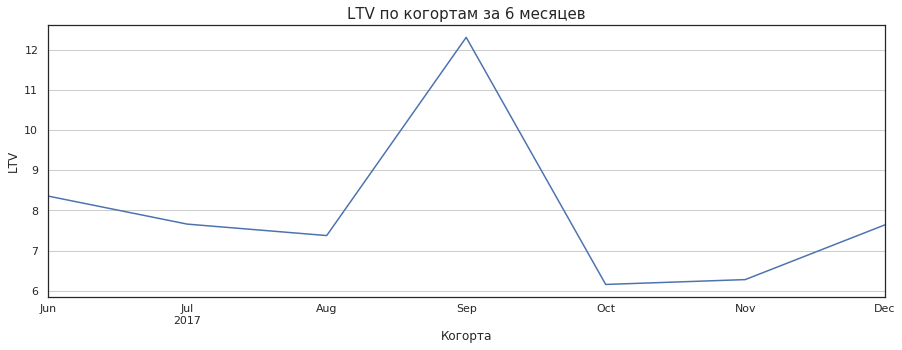

In [56]:
output_cum[5].head(7).plot(figsize = (15, 5), grid = True)
plt.title('LTV по когортам за 6 месяцев', size = 15)
plt.xlabel('Когорта', size = 12)
plt.ylabel('LTV', size = 12)
plt.show()

За первые 6 месяцев больше всего денег приносит сентябрьская когорта, а меньше всего - октябрьская с ноябрьской. 

## Маркетинговые метрики

### Суммы расходов на маркетинг

Рассчитаем общую сумму расходов на маркетинг.

In [57]:
print('Всего на маркетинг было потрачено {:.2f} у.е.'.format(df_costs['costs'].sum()))

Всего на маркетинг было потрачено 329131.62 у.е.


Рассчитаем сколько было потрачено на маркетинг на каждый из источников.

In [58]:
costs_source = df_costs.groupby('source_id').agg({'costs' : 'sum'}).sort_values(by = 'costs', ascending = False).reset_index()
costs_source

,source_id,costs
0,3,141321.63
1,4,61073.60
2,5,51757.10
3,2,42806.04
4,1,20833.27
5,10,5822.49
6,9,5517.49


Больше всего денег на маркетинг потратили на третий источник.

Посчитаем как траты на маркетинг изменялись для каждого источника в течении времени. Для этого выделим месяц из даты проведения кампании.

In [59]:
df_costs['dt_month'] = df_costs['dt'].astype('datetime64[M]')

Составим сводную таблицу.

In [60]:
costs_pivot = df_costs.pivot_table(index = 'dt_month', columns = 'source_id', values = 'costs', aggfunc = 'sum')
costs_pivot

source_id,1,2,3,4,5,9,10
dt_month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


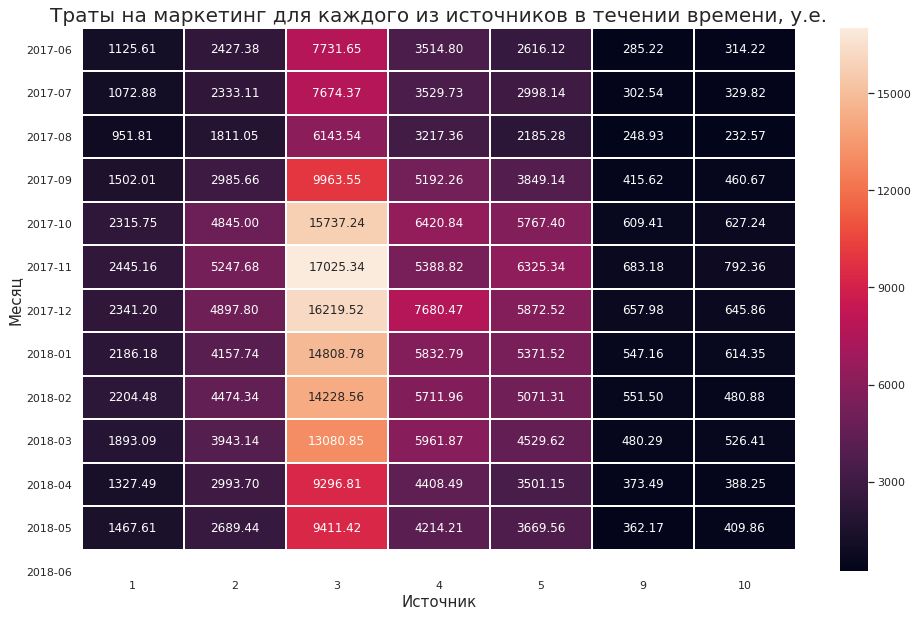

In [61]:
sns.set(style='white')
plt.figure(figsize=(16, 10))
plt.title('Траты на маркетинг для каждого из источников в течении времени, у.е.', fontsize = 20)
sns.heatmap(costs_pivot, annot = True, linewidths = 1, fmt = '.2f', linecolor = 'white', yticklabels = output.index.strftime('%Y-%m'))
plt.xlabel('Источник', fontsize = 15)
plt.ylabel('Месяц', fontsize = 15)
plt.show()

Видно, что основной упор маркетлоги делают на третий источник. Первый, девятый и десятый источники не являются основными средствами продвижения продукта.

Посмотрим на распределение затрат на маркетинг, не разбивая по источникам, в течение времени.

In [62]:
costs_month = df_costs.groupby('dt_month').agg({'costs' : 'sum'})

Визуализируем результат.

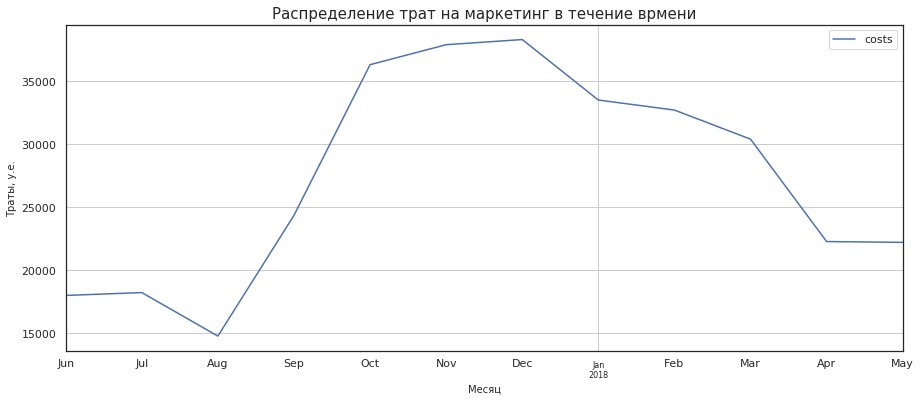

In [63]:
costs_month.plot( figsize = (15, 6), grid = True)
plt.title('Распределение трат на маркетинг в течение врмени', size = 15)
plt.xlabel('Месяц', size = 10)
plt.ylabel('Траты, у.е.', size = 10)
plt.xticks(fontsize = 8)
plt.show()

Месяцами, в которые реклама хочет больше всего привлечь внимание, являются октябрь, ноябрь, декабрь. С июня по август 2017 года и с апреля по май 2018 год траты значительно меньше.

### Стоимость привлечения клиента (CAC)

Cтоимость привлечения клиента (англ. *customer aсquisition cost*) — сумма денег, в которую компании обходится новый клиент.

Для рассчета этой метрики нужно воспользоваться данными из всех трех файлов. Подготовим данные для объединения всех таблиц.

Сначала оставим в таблице `df_visits` только уникальных пользователей.

In [64]:
visits_new = df_visits.query('start_ts == first_visit_date')

Затем объеденим полученную таблицу с таблицей `df_orders` по пользователям.

In [65]:
orders_visits_new = df_orders.merge(visits_new, on = 'uid', how = 'inner')

Сгруппируем две последние таблицы по источнику и посчитаем количество покупателей.

In [66]:
source_buyers = orders_visits_new.groupby('source_id').agg({'uid' : 'nunique'}).reset_index()
source_buyers.columns = ['source_id', 'n_buyers']
source_buyers

,source_id,n_buyers
0,1,2899
1,2,3506
2,3,10473
3,4,10296
4,5,6931
5,7,1
6,9,1088
7,10,1329


Объеденим полученную таблицу с таблицей `costs_source`, где находится информация о суммарных тратах на каждый источник маркетинга.

In [67]:
source_buyers_costs = source_buyers.merge(costs_source, how = 'left')
source_buyers_costs

,source_id,n_buyers,costs
0,1,2899,20833.27
1,2,3506,42806.04
2,3,10473,141321.63
3,4,10296,61073.60
4,5,6931,51757.10
5,7,1,NaN
6,9,1088,5517.49
7,10,1329,5822.49


Выходит что, затрат на седьмой источник не было. 

Теперь можно рассчитать САС, поделив затраты на число покупателей.

In [68]:
source_buyers_costs['cac'] = source_buyers_costs['costs'] / source_buyers_costs['n_buyers']
cac = source_buyers_costs
cac

,source_id,n_buyers,costs,cac
0,1,2899,20833.27,7.186364
1,2,3506,42806.04,12.209367
2,3,10473,141321.63,13.493901
3,4,10296,61073.60,5.931779
4,5,6931,51757.10,7.467479
5,7,1,NaN,NaN
6,9,1088,5517.49,5.071222
7,10,1329,5822.49,4.381106


In [69]:
print('Средний САС по всем источникам равен {:.2f}'.format(cac['cac'].mean()))

Средний САС по всем источникам равен 7.96


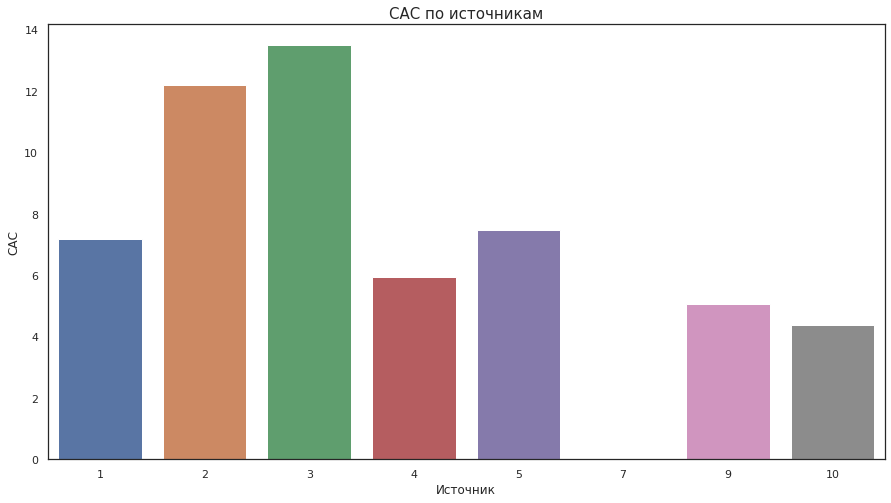

In [70]:
plt.figure(figsize = (15, 8))

sns.barplot(data = cac , x = 'source_id', y = 'cac')
plt.title('САС по источникам', fontsize = 15)
plt.xlabel('Источник', fontsize = 12)
plt.ylabel('САС', fontsize = 12)
plt.show()

Самыми дорогими клиентами являются пользователи, пришедшие из второго и третьего источников. Чтобы узнать окупаемость нужно рассчитать *ROMI*.

### ROMI

**ROMI** (от англ. *return on marketing investments*) - это возврат на маркетинговые инвестиции, который можно посчитать поделив разность валовой прибыли от кампании и затрат на маркетинг на затраты на маркетинг.

Чтобы посчитать *ROMI* для каждого источника напишем цикл, но перед этим подготовим для него необходимые таблицы.

Составим справочник с источниками, через которые пользователи впервые перешли на сайт.

In [71]:
uid_source = df_visits.groupby(['uid','source_id']).agg({'start_ts':'min'}).reset_index()
uid_source = uid_source.sort_values(['uid','start_ts'], ascending=[True,True]).drop_duplicates('uid')
uid_source.drop(['start_ts'], axis='columns', inplace=True)
uid_source.head()

,uid,source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


Объеденим `uid_source` с `df_orders` по столбцу `uid`.

In [72]:
df_orders = df_orders.merge(uid_source, on = 'uid', how = 'left')
df_orders.head()

,buy_ts,revenue,uid,buy_month,buy_year,order_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,6,2017,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,6,2017,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,6,2017,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,6,2017,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,6,2017,2017-06-01,3


Составим список источников.

In [75]:
source_id = df_orders['source_id'].unique()
source_id = np.sort(source_id)
source_id

array([ 1,  2,  3,  4,  5,  7,  9, 10])

In [ ]:
df_costs

Составим цикл, где в зависимости от источника посчитаем *ROMI* по когортам.

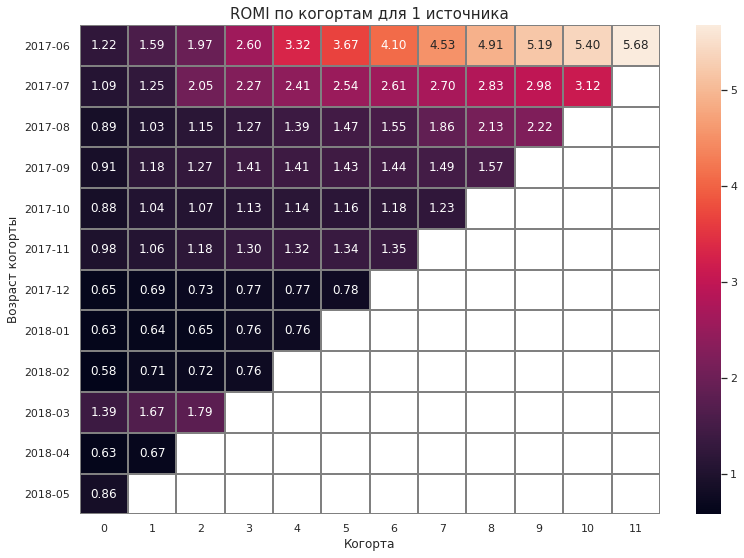

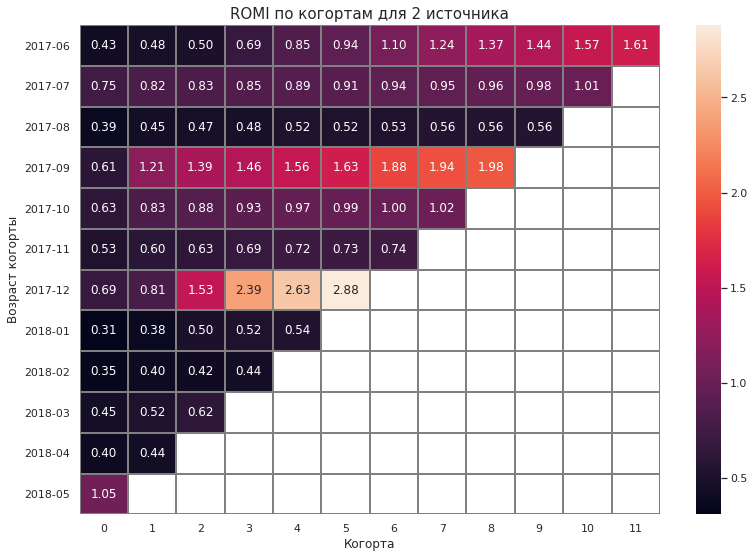

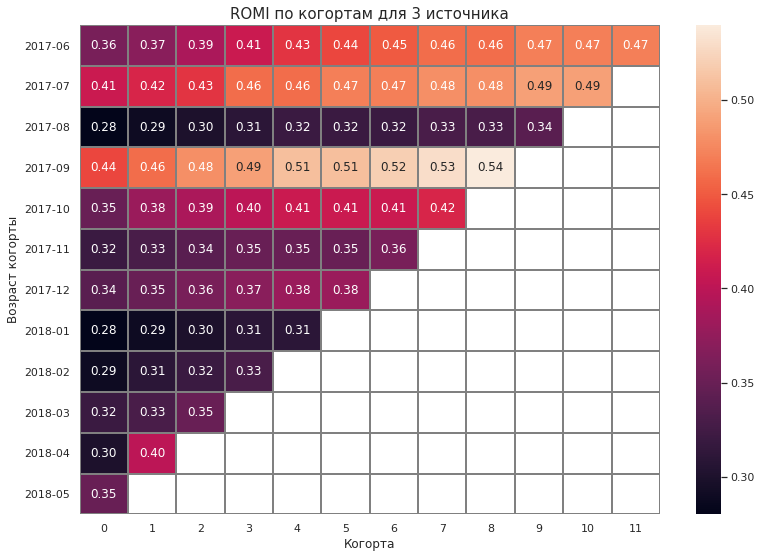

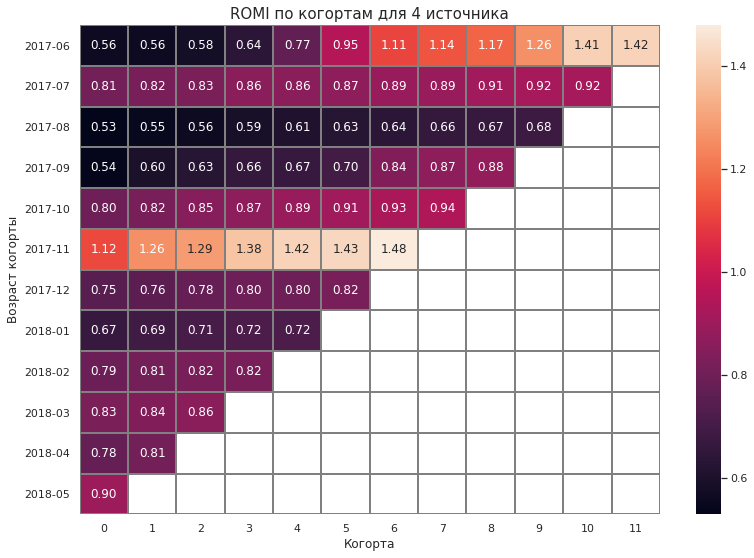

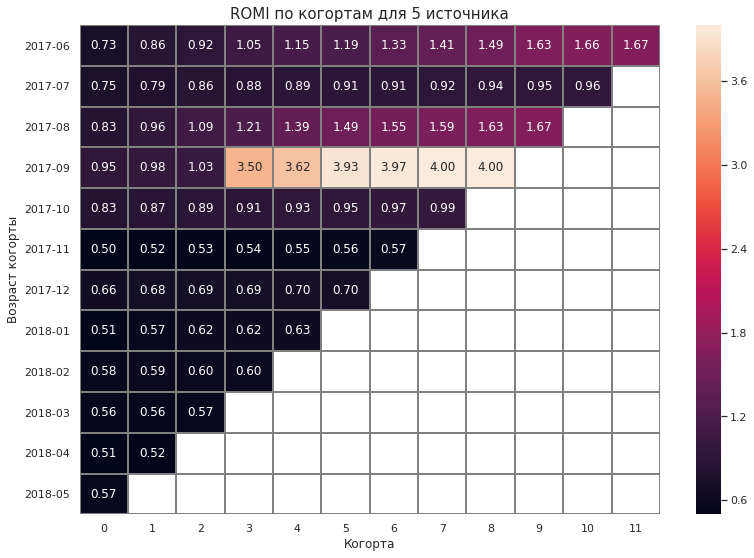

Для источника 7 невозможно посчитать ROMI


<Figure size 936x648 with 0 Axes>

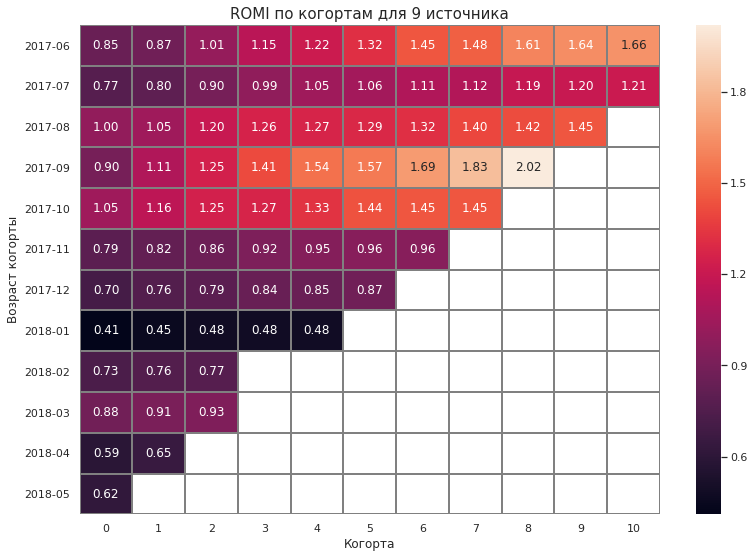

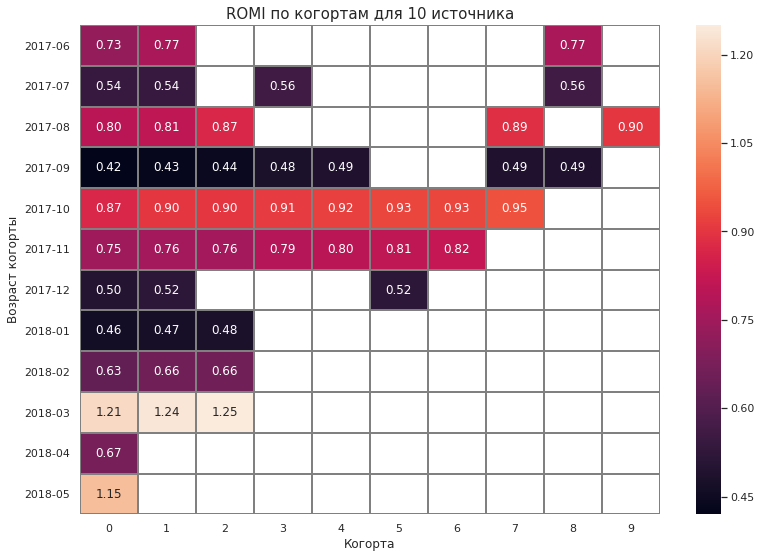

In [74]:
for source in source_id:
    try:
        df_orders_m = df_orders.loc[df_orders['source_id'] == source]
        df_costs_m = df_costs.loc[df_costs['source_id'] == source]

        first_orders = df_orders_m.groupby(['uid'])['buy_ts'].min().reset_index()
        first_orders.columns = ['uid', 'first_order_month']
        first_orders['first_order_month'] = first_orders['first_order_month'].astype('datetime64[M]')

        cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
        cohort_sizes.columns = ['first_order_month', 'n_buyers']

        orders_new = pd.merge(df_orders_m,first_orders, on='uid')

        cohorts = orders_new.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()

        report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

        report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
        report['age'] = report['age'].round().astype('int')

        report['ltv'] = report['revenue'] / report['n_buyers']

        monthly_costs = df_costs_m.groupby('dt_month').sum()

        report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='dt_month')
        report_new['cac'] = report_new['costs'] / report_new['n_buyers']

        report_new['romi'] = report_new['ltv'] / report_new['cac']
        output = report_new.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')

        sns.set(style='white')   
        plt.figure(figsize=(13, 9))
        sns.heatmap(output.cumsum(axis=1).round(2), annot=True, fmt='.2f', linewidths=1, linecolor='gray', 
                    yticklabels = output.index.strftime('%Y-%m'))
        plt.title('ROMI по когортам для {} источника'.format(source), fontsize = 15)
        plt.xlabel('Когорта', fontsize = 12)
        plt.ylabel('Возраст когорты', fontsize = 12)
        plt.show()
    except:
        print('Для источника {} невозможно посчитать ROMI'.format(source))

Наиболее окупаемым источником является первый. Большинство когорт в первом источнике окупились уже на второй месяц, а за весь рассматриваемый период клиенты из июньской когорты окупились примерно в 5,5 раз. Остальные когорты не так сильно показывают рост окупаемости. Также видно, что пользователи июньской когорты предпочитают переходить на сайт с первого источника. Остальные источники не показывают такой сильный результат в сравнении с первым источником. В наиболее затратном третьем источнике ни одна из маркетинговых кампаний не окупилась. Десятый источник имеет нестабильное пользование клиентами, что видно по "рваной" тепловой карте.

## Вывод

В ходе проекта были рассчитаны продуктовые метрики, маркетинговые метрики и метрики электронной коммерции.

**Продуктовые метрики:**
* cреднее количество уникальных пользователей в день (DAU): 907;
* cреднее количество уникальных пользователей в неделю (WAU): 5716;
* cреднее количество уникальных пользователей в месяц (MAU): 23228;
* пользователи в среднем заходят на сайт 987 раз в день. Огромный пик пользователей наблюдался в предновогодние дни, а также была замечена нулевая активность пользователей в конце апреля 2018 года, что, скорее всего, можно объяснить проблемой в работе сайта;
* Retention Rate отобразил низкий показатель возвращаемости клиентов. После первого месяца использования около 95% пользователей не возвращаются на сайт.

**Метрики электронной коммерции**:
* большинство пользователей совершают покупку после 60 секунд нахождения на сайте;
* cреднее количество покупок на одного покупателя за 6 месяцев: 1.32;
* cредний чек равен 4.84 у.е.;
* июньская, июльская, августовская, сениябрьская принесли больше всего денег компании. Также хороший потенциал имеет декбарьская когорта.

**Маркетинговые метрики**:
* всего на маркетинг было потрачено 329131.62 у.е.;
* затраты на маркетинг на каждый из источников:
    * 3	источник - 141321.63 у.е.;
    * 4	источник - 61073.60 у.е.;
    * 5	источник - 51757.10 у.е.;
    * 2	источник - 42806.04 у.е.;
    * 1 источник - 20833.27 у.е.;
    * 10 источник - 5822.49 у.е.;
    * 9	источник - 5517.49 у.е.
    
    Пик трат на маркетинг приходился на новогодние праздники.
* самыми дорогими клиентами являются пользователи, пришедшие из второго и третьего источников.
* наибольшей окупаемость по тратам на маркетинг обладает первый источник. Также он имеет наибольшую популярность у наиболее активной июньской когорты.  